### Imports

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

#### Load Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### EDA

In [ ]:
print("Training samples:", x_train.shape[0])
print("Testing samples:", x_test.shape[0])
print("Image shape:", x_train[0].shape)

Training samples: 60000
Testing samples: 10000
Image shape: (28, 28)


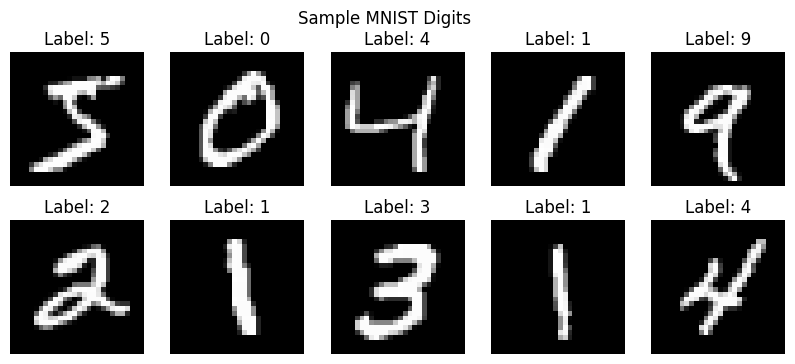

In [ ]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")
plt.suptitle("Sample MNIST Digits")
plt.show()

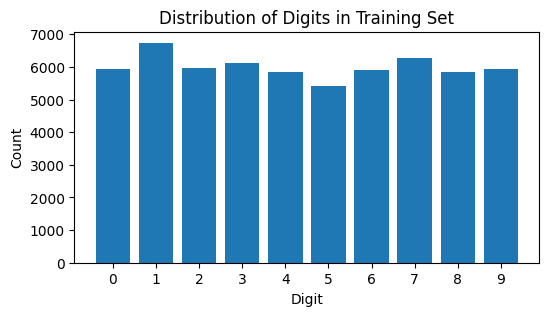

In [ ]:
label_counts = Counter(y_train)
plt.figure(figsize=(6,3))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel("Digit")
plt.ylabel("Count")
plt.xticks(range(10))
plt.title("Distribution of Digits in Training Set")
plt.show()

In [8]:
print("Min pixel value:", np.min(x_train))
print("Max pixel value:", np.max(x_train))
print("Mean pixel value:", np.mean(x_train))
print("Std Dev of pixel values:", np.std(x_train))

Min pixel value: 0
Max pixel value: 255
Mean pixel value: 33.318421449829934
Std Dev of pixel values: 78.56748998339798


### Data Preparation

#### Reshape data to fit CNN (samples, height, width, channels)

In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

#### Normalize pixel values (0-255 to 0-1)

In [14]:
x_train = x_train / 255.0
x_test = x_test / 255.0

#### One-hot encode labels

In [15]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [16]:
print("Preprocessed training shape:", x_train.shape)

Preprocessed training shape: (60000, 28, 28, 1)


### Model Training

#### Build CNN Model

In [62]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  
    MaxPooling2D((2,2)),                                         
    Conv2D(64, (3,3), activation='relu'),                        
    MaxPooling2D((2,2)),
    Flatten(),                                                 
    Dense(128, activation='relu'),                              
    Dropout(0.5),                                               
    Dense(10, activation='softmax')                            
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\arpit\Desktop\DS_Course\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_split=0.1,
    epochs=5,                
    batch_size=128,
    verbose=2
)

Epoch 1/5
422/422 - 12s - 30ms/step - accuracy: 0.8971 - loss: 0.3381 - val_accuracy: 0.9808 - val_loss: 0.0648
Epoch 2/5
422/422 - 21s - 49ms/step - accuracy: 0.9679 - loss: 0.1072 - val_accuracy: 0.9883 - val_loss: 0.0436
Epoch 3/5
422/422 - 10s - 25ms/step - accuracy: 0.9773 - loss: 0.0757 - val_accuracy: 0.9898 - val_loss: 0.0370
Epoch 4/5
422/422 - 11s - 27ms/step - accuracy: 0.9806 - loss: 0.0650 - val_accuracy: 0.9902 - val_loss: 0.0354
Epoch 5/5
422/422 - 10s - 24ms/step - accuracy: 0.9844 - loss: 0.0532 - val_accuracy: 0.9907 - val_loss: 0.0360


### Model Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy:", test_acc)

Test Accuracy: 0.991100013256073


### Results and Visualisation

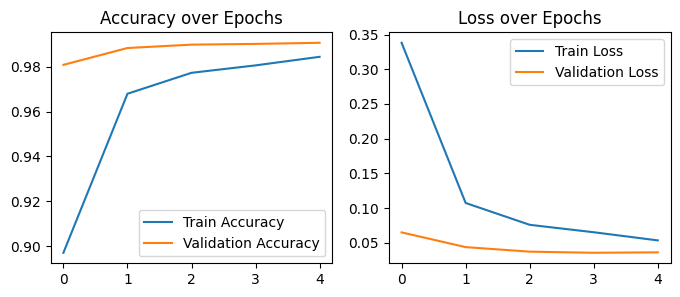

In [53]:
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss over Epochs")

plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


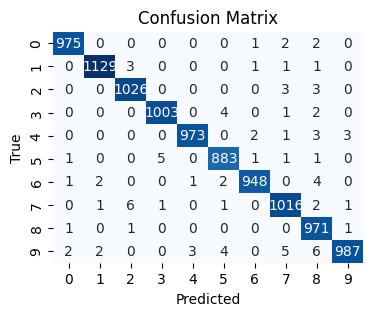

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


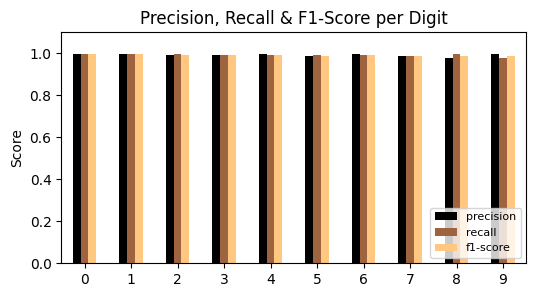

In [ ]:

report = classification_report(y_true, y_pred_classes, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df.iloc[:10, :3].plot(kind="bar", figsize=(6,3), colormap="copper")
plt.title("Precision, Recall & F1-Score per Digit")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0,1.1)
plt.legend(loc="lower right", fontsize=8)
plt.show()

### Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


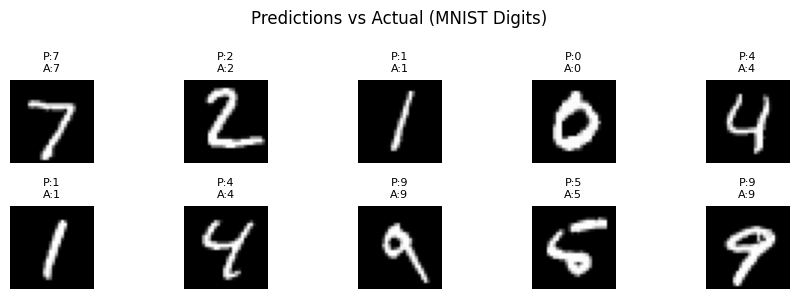

In [59]:
predictions = model.predict(x_test)

plt.figure(figsize=(9,3))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"P:{np.argmax(predictions[i])}\nA:{np.argmax(y_test[i])}", fontsize=8)
    plt.axis("off")

plt.suptitle("Predictions vs Actual (MNIST Digits)")
plt.tight_layout()
plt.show()